In [103]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from sklearn.metrics import r2_score
sns.set()

In [104]:
df=pd.read_csv(r'H:\CLASS\sem 3\Computation Statistics\CARDETAILSFROMCARDEKHO.csv')

In [105]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [106]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [107]:
df.shape

(4340, 8)

In [108]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [109]:
df["fuel"] = df["fuel"].astype('category')
df["fuel_NO."] = df["fuel"].cat.codes
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_NO.
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,4
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,4
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,4
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,1


In [110]:
df["seller_type"] = df["seller_type"].astype('category')
df["seller_NO."] = df["seller_type"].cat.codes
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_NO.,seller_NO.
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,4,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,4,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,1,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,4,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,1,1


In [111]:
df['transmission_NO.'] = df.transmission.apply(lambda x:1 if x == 'Manual' else 0)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_NO.,seller_NO.,transmission_NO.
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,4,1,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,4,1,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,1,1,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,4,1,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,1,1,1


In [112]:
df["owner"] = df["owner"].astype('category')
df["owner_NO."] = df["owner"].cat.codes
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_NO.,seller_NO.,transmission_NO.,owner_NO.
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,1,1,1,2


(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text major ticklabel objects>)

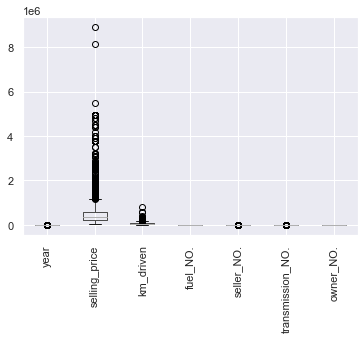

In [113]:
df.boxplot()
plt.xticks(rotation=90)

In [114]:
x=pd.DataFrame(df[['year','km_driven','fuel_NO.']])
y=pd.DataFrame (df[['selling_price']])

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=0)

In [116]:
selling_price=LinearRegression()

In [117]:
selling_price.fit(x_train,y_train)

LinearRegression()

In [118]:
selling_price.coef_

array([[ 4.93608513e+04, -1.01671541e+00, -9.48737382e+04]])

In [119]:
y_pred=selling_price.predict(x_test)
y_pred

array([[578099.38393492],
       [611263.95877682],
       [341435.27157751],
       ...,
       [916020.99322306],
       [528830.111746  ],
       [538878.67661862]])

In [120]:
#find r2 value to check whether data is fit into the model or not if r2 is{0: not fit,1: fit, other: worst
r2=r2_score(y_test,y_pred)
r2

0.2210721217544055

In [121]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 263076.09211999737
Mean Squared Error: 276553092346.1906
Root Mean Squared Error: 525883.1546514783


In [122]:
residuals=y_test-y_pred

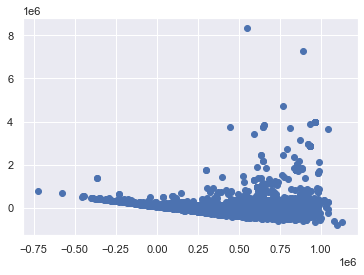

In [128]:
plt.scatter(y_pred,residuals)
#plt.plot(selling_price.x_test,selling_price.y_pred)
plt.show()